# Introduction

Take me to the [Fraud Detection Code](https://github.com/AMoazeni/Machine-Learning-Fraud-Detection/blob/master/Code/Fraud%20Detection.py) written in Python, using the '[MiniSOM](https://github.com/JustGlowing/minisom)' library!


<br></br>
This article explores the detection fraudulent credit card activity in a bank dataset. We are going to use an Unsupervised Machine Learning technique called Self Organizing Map (SOM) to achieve this. The SOM groups similar Credit Card activity together. We're assuming that the outlier group (different from the majority of other groups) is fraudulent. The fraudulent group is the tabulated and can be forwarded to the fraud investigation department. This table can also be used to alert the customer instantly through text or email if they have set up Multi Factor Authentication (MFA).


<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Fraud-Detection/master/Jupyter%20Notebook/Images/01%20-%20Credit%20Card.gif" width=50% alt="Credit-Card"></div>



<br></br>

# Self Organizing Map (SOM)

Self Organizing Maps are used to reveal correlations that are not easily identifiable, by decreasing dimensionality in the dataset (condense data from several columns into a few columns). It was popularized by [Teuvo Kohonen](https://github.com/AMoazeni/Machine-Learning-Fraud-Detection/blob/master/Research%20Papers/01%20-%20Kohonen%20SOM.pdf) who is a Finnish researcher. Unlike supervised learning, unsupervised SOMs don't have activation functions, labeled datasets, and don't require back propagation. They find patterns in your data and group similar data points together.


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Fraud-Detection/master/Jupyter%20Notebook/Images/02%20-%20SOM.png" width=75% alt="Self-Organizing-Map"></div>


<br></br>
SOMs retain the topology input data by masking a map onto the dataset. Put simply, SOMs find patterns in data by calculating and minimizing the "distance" between SOM map points and data points. They repeat this calculation until the data is fully mapped, the following figure demonstrates this.


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Fraud-Detection/master/Jupyter%20Notebook/Images/03%20-%20SOM%20Map.png" width=75% alt="SOM-Map"></div>



<br></br>

# SOM Algorithm

### STEP 1
Start with a dataset consisting of 'n' features (independent variables).

### STEP 2
Create a grid composed of nodes, each one having a weight vector of 'n' features elements.

### STEP 3
Randomly initialize the values of the weight vectors to small numbers close to O (but not equal to 0).

### STEP 4
Select a random observation point from the dataset.

### STEP 5
Compute the Euclidean distances from this point to the different neurons in the network.

### STEP 6
Select the neuron that has the minimum distance to the point. This neuron is called the winning node.

### STEP 7
Update the weights of the winning node to move it closer to the starting point.

### STEP 8
Use a Gaussian neighborhood function of means for the winning node, and update the weights of the winning node neighbors to move them closer to the point. The neighborhood radius is the sigma in your Gaussian function.

### STEP 9
Repeat Steps 1 to 5 and update the weights after each observation (Reinforcement Learning) or after a batch of observations (Batch Learning). Repeat until the network converges to a point and the neighborhood stops decreasing.



<br></br>

# Results

Run the first part of the code to generate the following Self Organizing Map result. Assuming that most applications are truthful (majority dark cells), the outliers must be fraudulent (white cells). Plug in the coordinates of the white cells into the 'fraud' variable. The results will be saved into the Data folder called 'Fraud_Results.csv'.


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Fraud-Detection/master/Jupyter%20Notebook/Images/04%20-%20Results.png" width=75% alt="SOM-Results"></div>


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Fraud-Detection/master/Jupyter%20Notebook/Images/05%20-%20SOM%20Frauds.png" width=75% alt="SOM-Frauds"></div>




<br></br>

# Code

1. Install [Anaconda](https://www.anaconda.com/download/).
2. Download this repository and navigate to it.
3. Include the [minisom library](https://github.com/JustGlowing/minisom) in your working directory.
4. Click 'Run' to step through the [Fraud Detection Jupyter Notebook](https://github.com/AMoazeni/Machine-Learning-Fraud-Detection/blob/master/Jupyter%20Notebook/Fraud%20Detection.ipynb) code.


<br></br>
```shell
$ git clone https://github.com/AMoazeni/Machine-Learning-Fraud-Detection.git
$ cd Machine-Learning-Fraud-Detection
```



<br></br>

# Happy Coding!

Check out [AMoazeni's Github](https://github.com/AMoazeni/) for more Machine Learning, and Robotics repositories.

<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Word-Count/master/Jupyter%20Notebook/Images/06%20-%20Cat%20Typing.gif" width=40% alt="Cat-Typing"></div>





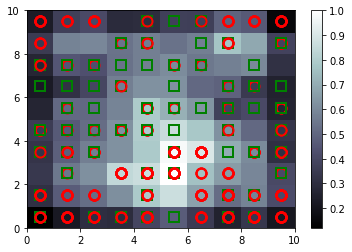

In [24]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
dataset = pd.read_csv('../Data/Credit_Card_Applications.csv')
# All columns except the last are attributes (not dependent value)
X = dataset.iloc[:, :-1].values
# People whos applications were approved (1) or not approved (0)
y = dataset.iloc[:, -1].values


# Feature Scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
# 'x=10' 'y=10' defines a 10x10 SOM grid, too small and you miss patterns
# 'input_len = 15' is the number of columns to look at in X
# 'sigma' is the radius of the different radius in the grid, default value = 1
# 'learning_rate' hyprer-parameter which decided how much the rates are updated. Higher is faster
# 'learning_rate' and 'decay_function'deerming rate of convergence, default value = 0.5
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
# Initialize weights to small numbers close to (but not equal to) zero
som.random_weights_init(X)
# Train SOM with a 'num_iteration' resembling epochs
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()



In [30]:
# Finding the frauds

# Save the results into a dictionary
mappings = som.win_map(X)

# Select fraudulent outlier coordinates (white boxes)
frauds = np.concatenate((mappings[(6,2)], mappings[(6,3)]), axis = 0)

# Perform inverse scaling to retrieve original values
frauds = sc.inverse_transform(frauds)

# Save frauds to file and display the results
frauds = pd.DataFrame(frauds)
frauds.to_csv('../Data/Fraud_Results.csv')
display(frauds)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15801473.0,0.0,20.83,0.500,1.0,10.0,2.0,1.000,0.0,0.0,0.0,0.0,2.0,260.0,1.0
1,15794204.0,0.0,19.58,0.665,2.0,9.0,4.0,1.665,0.0,0.0,0.0,0.0,2.0,220.0,6.0
2,15734008.0,0.0,15.75,0.375,2.0,8.0,4.0,1.000,0.0,0.0,0.0,0.0,2.0,120.0,19.0
3,15739548.0,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0
4,15706762.0,0.0,40.83,3.500,2.0,3.0,5.0,0.500,0.0,0.0,0.0,0.0,1.0,1160.0,1.0
5,15783883.0,0.0,38.92,1.665,2.0,6.0,4.0,0.250,0.0,0.0,0.0,0.0,2.0,0.0,391.0
6,15756538.0,0.0,39.08,4.000,2.0,8.0,4.0,3.000,0.0,0.0,0.0,0.0,2.0,480.0,1.0
7,15651868.0,0.0,38.75,1.500,2.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,76.0,1.0
8,15728523.0,0.0,38.33,4.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,160.0,1.0
9,15716082.0,0.0,22.25,1.250,1.0,1.0,1.0,3.250,0.0,0.0,0.0,0.0,2.0,280.0,1.0
